In [1]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), activation='relu',input_shape=(120,120,3)))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


img_original_path = r'C:\Users\Rentalhub\Desktop\5worksProject\resize'

train = img_original_path + '\\train'
val = img_original_path + '\\val'
test = img_original_path + '\\test'

from keras.preprocessing.image import ImageDataGenerator

train_data = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True    
)


val_data = ImageDataGenerator(
    rescale=1./255
)

test_data = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_data.flow_from_directory(
    train,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_data.flow_from_directory(
    val,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_data.flow_from_directory(
    test,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 55, 55, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 256)       590080    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 51, 51, 128)      

In [2]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 60,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 40
    )

Epoch 1/50
60/60 [==============================] - 106s 2s/step - loss: 0.6611 - accuracy: 0.7271 - val_loss: 0.6233 - val_accuracy: 0.6266
Epoch 2/50
60/60 [==============================] - 91s 2s/step - loss: 0.5735 - accuracy: 0.7510 - val_loss: 0.6789 - val_accuracy: 0.6313
Epoch 3/50
60/60 [==============================] - 47s 779ms/step - loss: 0.5198 - accuracy: 0.7469 - val_loss: 0.7808 - val_accuracy: 0.6125
Epoch 4/50
60/60 [==============================] - 24s 408ms/step - loss: 0.4950 - accuracy: 0.7594 - val_loss: 0.5604 - val_accuracy: 0.6156
Epoch 5/50
60/60 [==============================] - 26s 439ms/step - loss: 0.5006 - accuracy: 0.7531 - val_loss: 0.7464 - val_accuracy: 0.5797
Epoch 6/50
60/60 [==============================] - 24s 408ms/step - loss: 0.4699 - accuracy: 0.7812 - val_loss: 1.0890 - val_accuracy: 0.5859
Epoch 7/50
60/60 [==============================] - 24s 405ms/step - loss: 0.4398 - accuracy: 0.8135 - val_loss: 1.1065 - val_accuracy: 0.6297
Epoc

Accuracy :  0.8142292
Loss :  0.41072620087365314

Validation_acc :  0.6205937528610229
Validation_loss :  0.7583867710828781


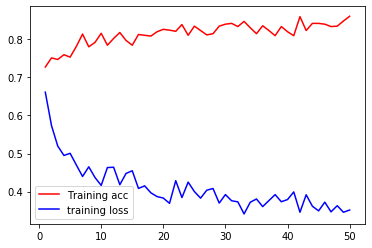

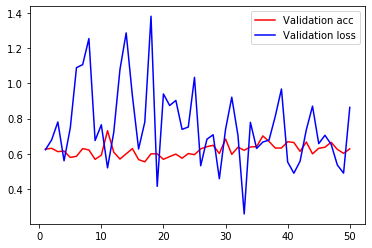

In [3]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print()
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




In [4]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 20)
print("test_loss : ", test_loss)
print("test_acc : ", test_acc)

test_loss :  0.8876966834068298
test_acc :  0.640625


In [2]:
model = models.Sequential()

model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same',input_shape=(120,120,3)))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))


model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))

model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(layers.BatchNormalization(axis=3))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D((2,2),strides=2))


model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 120, 120, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 120, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 120, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 120, 120, 64)      256       
_________________________________________________________________
activation_2 (Activation)    (None, 120, 120, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 120, 64)     

In [3]:
train_generator = train_data.flow_from_directory(
    train,
    target_size=(120,120),
    batch_size=16,
    class_mode='binary'
)

val_generator = val_data.flow_from_directory(
    val,
    target_size=(120,120),
    batch_size=8,
    class_mode='binary'
)

test_generator = test_data.flow_from_directory(
    test,
    target_size=(120,120),
    batch_size=8,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 640 images belonging to 2 classes.


In [4]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 150,
    epochs = 20,
    validation_data = val_generator,
    validation_steps = 30
    )

Epoch 1/20
150/150 [==============================] - 112s 748ms/step - loss: 2.7688 - accuracy: 0.7125 - val_loss: 3.5779 - val_accuracy: 0.6167
Epoch 2/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3894 - accuracy: 0.8196 - val_loss: 2.9574 - val_accuracy: 0.6667
Epoch 3/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3711 - accuracy: 0.8263 - val_loss: 3.4180 - val_accuracy: 0.5958
Epoch 4/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3566 - accuracy: 0.8467 - val_loss: 0.4654 - val_accuracy: 0.7792
Epoch 5/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3555 - accuracy: 0.8533 - val_loss: 1.2864 - val_accuracy: 0.4208
Epoch 6/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3284 - accuracy: 0.8521 - val_loss: 0.3105 - val_accuracy: 0.7292
Epoch 7/20
150/150 [==============================] - 103s 687ms/step - loss: 0.3310 - accuracy: 0.8550 - val_loss: 0.3763 -

Accuracy :  0.8567708
Loss :  0.43947528864567487

Validation_acc :  0.7052083358168602
Validation_loss :  0.9950047238729894


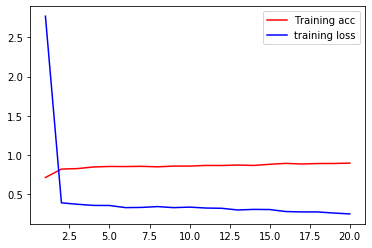

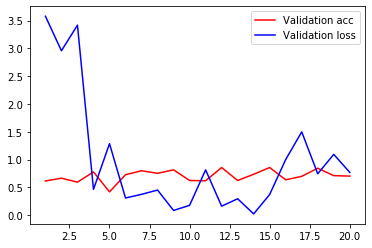

In [5]:
import numpy as np

history_data = history.history

accuracy = history_data['accuracy']
validation_acc =history_data['val_accuracy']
loss = history_data['loss']
validation_loss = history_data['val_loss']


mean_acc = np.mean(accuracy)
mean_loss = np.mean(loss)
mean_val_acc = np.mean(validation_acc)
mean_val_loss = np.mean(validation_loss)

print("Accuracy : " , mean_acc)
print("Loss : " , mean_loss)
print()
print("Validation_acc : ", mean_val_acc)
print("Validation_loss : ", mean_val_loss)

epochs = range(1,len(accuracy)+1,1)

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, loss, 'b', label='training loss')
plt.legend()
plt.show()

plt.plot(epochs, validation_acc, 'r', label='Validation acc')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




In [ ]:
test_loss, test_acc = model.evaluation_generation(test_generator, )